Normalization constant: 1.00000000000000
Mean income: 2.00000000000000
Lorenz curve L(p): 1.0*((-1/(p - 1.0))**1.0 - log(-1/(p - 1.0)) - 1)/(-1/(p - 1.0))**1.0
Gini coefficient: 0.5


<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return 1.0*(-1/(p - 1.0))**(-1.0)*((-1/(p - 1.0))**1.0 - log(-1/(p - 1.0)) - 1)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in log
  return 1.0*(-1/(p - 1.0))**(-1.0)*((-1/(p - 1.0))**1.0 - log(-1/(p - 1.0)) - 1)


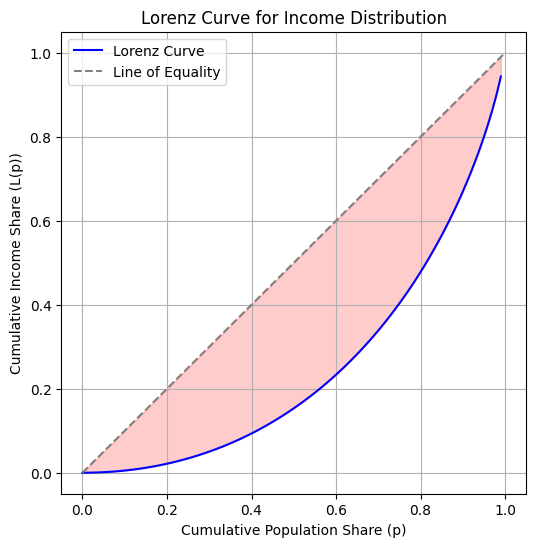

New mean income after policy: 4.0
Gini after policy: 0.24999999999999867


<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in divide
  return (-1/(p - 1.0))**(-1.0)*((-1/(p - 1.0))**1.0*(0.679570457114761*reduce(minimum, [2, 2.0*log(-2.71828182845905/(p - 1.0))]) + 1.35914091422952) - 0.499999999999999*(log(-2.71828182845905/(p - 1.0)) + 1)*exp(0.5*reduce(minimum, [2, 2.0*log(-2.71828182845905/(p - 1.0))])))*exp(-0.5*reduce(minimum, [2, 2.0*log(-2.71828182845905/(p - 1.0))]))
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in log
  return (-1/(p - 1.0))**(-1.0)*((-1/(p - 1.0))**1.0*(0.679570457114761*reduce(minimum, [2, 2.0*log(-2.71828182845905/(p - 1.0))]) + 1.35914091422952) - 0.499999999999999*(log(-2.71828182845905/(p - 1.0)) + 1)*exp(0.5*reduce(minimum, [2, 2.0*log(-2.71828182845905/(p - 1.0))])))*exp(-0.5*reduce(minimum, [2, 2.0*log(-2.71828182845905/(p - 1.0))]))


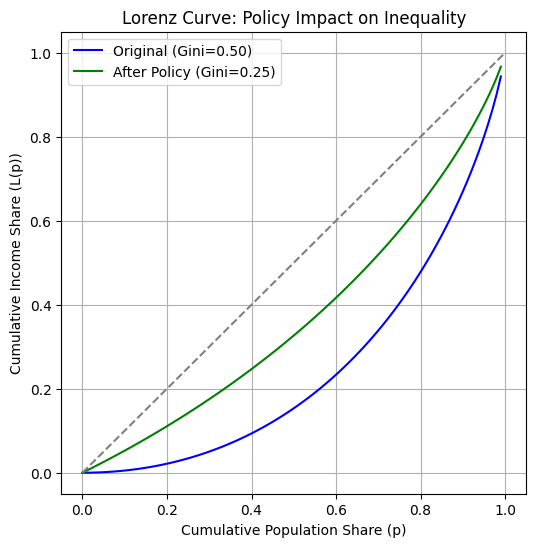

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------
# Inequality Analysis with Calculus
# -------------------------------------
# This script uses symbolic calculus (SymPy) to analyze
# income distribution, compute the Lorenz curve, and
# estimate inequality using the Gini coefficient.
# -------------------------------------

# Define variable
x = sp.Symbol('x', positive=True)

# ------------------------------
# Example income distribution
# ------------------------------
# We model income distribution using a probability
# density function (PDF). For simplicity, let’s use
# an exponential distribution-like function:
# f(x) = λ * exp(-λx), with λ = 0.5
# (x ≥ 0, represents income)
# ------------------------------

λ = 0.5
f = λ * sp.exp(-λ * x)

# Ensure normalization (integral over [0, ∞] = 1)
normalization = sp.integrate(f, (x, 0, sp.oo))
print("Normalization constant:", normalization)

# ------------------------------
# Mean income (expected value)
# ------------------------------
mean_income = sp.integrate(x * f, (x, 0, sp.oo))
print("Mean income:", mean_income)

# ------------------------------
# Lorenz Curve
# ------------------------------
# The Lorenz curve L(p) shows the proportion of income
# earned by the bottom p% of the population.
#
# Formula:
#   L(p) = ( ∫_0^q x f(x) dx ) / mean_income
# where q is such that ∫_0^q f(x) dx = p
# ------------------------------

p = sp.Symbol('p', positive=True)
q = sp.Function('q')(p)

# CDF: F(q) = ∫_0^q f(x) dx
F_q = sp.integrate(f, (x, 0, x))

# For exponential dist: F(t) = 1 - exp(-λt)
F_t = 1 - sp.exp(-λ * x)

# Solve for q in terms of p (inverse CDF)
q_of_p = sp.solve(sp.Eq(1 - sp.exp(-λ * x), p), x)
q_of_p = q_of_p[0]

# Lorenz curve formula
L_p = (1 / mean_income) * sp.integrate(x * f, (x, 0, q_of_p))
L_p_simplified = sp.simplify(L_p)
print("Lorenz curve L(p):", L_p_simplified)

# ------------------------------
# Gini Coefficient
# ------------------------------
# Gini = 1 - 2 * ∫_0^1 L(p) dp
# ------------------------------

gini = 1 - 2 * sp.integrate(L_p_simplified, (p, 0, 1))
print("Gini coefficient:", float(gini))

# ------------------------------
# Plot Lorenz Curve
# ------------------------------
lorenz_func = sp.lambdify(p, L_p_simplified, 'numpy')
p_values = np.linspace(0, 1, 100)
L_values = lorenz_func(p_values)

plt.figure(figsize=(6, 6))
plt.plot(p_values, L_values, label="Lorenz Curve", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Line of Equality")
plt.fill_between(p_values, L_values, p_values, color="red", alpha=0.2)
plt.title("Lorenz Curve for Income Distribution")
plt.xlabel("Cumulative Population Share (p)")
plt.ylabel("Cumulative Income Share (L(p))")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# Policy Simulation Example
# ------------------------------
# Imagine a policy that increases incomes at the bottom
# (e.g., minimum wage or basic income). We can model this
# by shifting the distribution.
# ------------------------------

def shifted_distribution(shift):
    f_shift = λ * sp.exp(-λ * (x - shift))
    f_shift = sp.Piecewise((0, x < shift), (f_shift, True))
    return f_shift

shift = 2  # income floor of 2 units
f_shifted = shifted_distribution(shift)

# New mean income
mean_income_shifted = sp.integrate(x * f_shifted, (x, shift, sp.oo))

# New Lorenz curve under policy
F_t_shift = 1 - sp.exp(-λ * (x - shift))
q_of_p_shift = sp.solve(sp.Eq(F_t_shift, p), x)
q_of_p_shift = q_of_p_shift[0]

L_p_shift = (1 / mean_income_shifted) * sp.integrate(x * f_shifted, (x, shift, q_of_p_shift))
L_p_shifted = sp.simplify(L_p_shift)

gini_shifted = 1 - 2 * sp.integrate(L_p_shifted, (p, 0, 1))

print("New mean income after policy:", float(mean_income_shifted))
print("Gini after policy:", float(gini_shifted))

# Compare plots
lorenz_shifted_func = sp.lambdify(p, L_p_shifted, 'numpy')
L_values_shifted = lorenz_shifted_func(p_values)

plt.figure(figsize=(6, 6))
plt.plot(p_values, L_values, label=f"Original (Gini={float(gini):.2f})", color="blue")
plt.plot(p_values, L_values_shifted, label=f"After Policy (Gini={float(gini_shifted):.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Lorenz Curve: Policy Impact on Inequality")
plt.xlabel("Cumulative Population Share (p)")
plt.ylabel("Cumulative Income Share (L(p))")
plt.legend()
plt.grid(True)
plt.show()
